## PBL - Convolutional Neural Network(CNN) for Fashion MNIST with Tensorflow Keras

Install **"visualkeras"** a python library to visualize neural network architecture 

In [ ]:
pip install visualkeras

     |████████████████████████████████| 992 kB 7.1 MB/s 


### 1. Loading all necessary *libraries* and *packages* 

In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

Setting the model *parameters*

In [ ]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 128

### 2. Loading the [Zolando Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Data

In [ ]:
train_dataset = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_dataset = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")

*Reading and Labeling the 10 Clothing categories*

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### 3. Pre-processing the data[[1]](https://www.kaggle.com/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist)

In [ ]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

*Splitting the training data into training and validation set into a split ratio of 75-25 %*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

> ### Convolutional Neural Network

### 4. Train the model

*Lets keep the CNN model simple initially.*

In [ ]:

# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers

model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

> Model's summary

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

*3D visualization of our CNN model architecture*

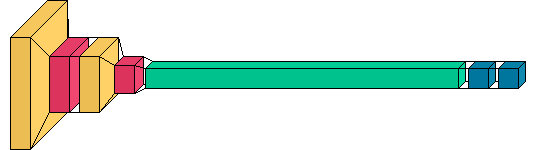

In [ ]:
visualkeras.layered_view(model)

*A more elaborate and labelled way of visualization*

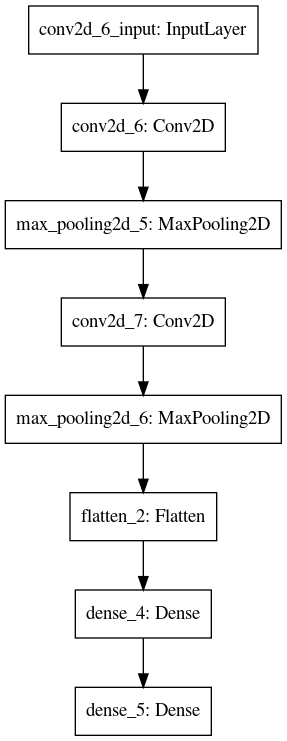

In [ ]:
plot_model(model, to_file='model.png')

*Setting the parameters and compiling our model*

In [ ]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

*Fit and Run the model with training and validation set of the data*

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.5239 - accuracy: 0.8144 - val_loss: 0.3818 - val_accuracy: 0.8607
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.3371 - accuracy: 0.8802 - val_loss: 0.3264 - val_accuracy: 0.8799
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2917 - accuracy: 0.8953 - val_loss: 0.3122 - val_accuracy: 0.8881
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2643 - accuracy: 0.9050 - val_loss: 0.2884 - val_accuracy: 0.8971
Epoch 5/100
352/352 [==============================] - 2s 4ms/step - loss: 0.2383 - accuracy: 0.9134 - val_loss: 0.2645 - val_accuracy: 0.9060
Epoch 6/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2157 - accuracy: 0.9216 - val_loss: 0.2603 - val_accuracy: 0.9073
Epoch 7/100
352/352 [==============================] - 2s 4ms/step - loss: 0.1986 - accuracy: 0.9279 - val_loss: 0.2443 - val_accuracy: 0.9139

Epoch 58/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.7275 - val_accuracy: 0.9017
Epoch 59/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.7269 - val_accuracy: 0.9102
Epoch 60/100
352/352 [==============================] - 2s 4ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.7317 - val_accuracy: 0.9152
Epoch 61/100
352/352 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.7532 - val_accuracy: 0.9170
Epoch 62/100
352/352 [==============================] - 2s 4ms/step - loss: 5.2451e-04 - accuracy: 0.9999 - val_loss: 0.7487 - val_accuracy: 0.9177
Epoch 63/100
352/352 [==============================] - 2s 4ms/step - loss: 1.1076e-04 - accuracy: 1.0000 - val_loss: 0.7699 - val_accuracy: 0.9178
Epoch 64/100
352/352 [==============================] - 2s 4ms/step - loss: 7.0174e-05 - accuracy: 1.0000 - val_loss: 0.7820 - v

### 5. Evaluate the model

In [ ]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2813 - accuracy: 0.9803
Test loss: 0.2812943458557129
Test accuracy: 0.9803166389465332


We got accuracy of *98.03 %* here, now lets try to add droput and batch normalization layers as our model is overfitting (we were getting the training accuracy of *100 %*)

### 6. Tuning the Model

*Lets add Batch Normalization and Dropout layers (To avoid overfitting) to the model.*

In [ ]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

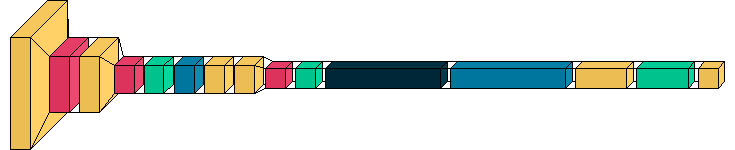

In [ ]:
visualkeras.layered_view(model)

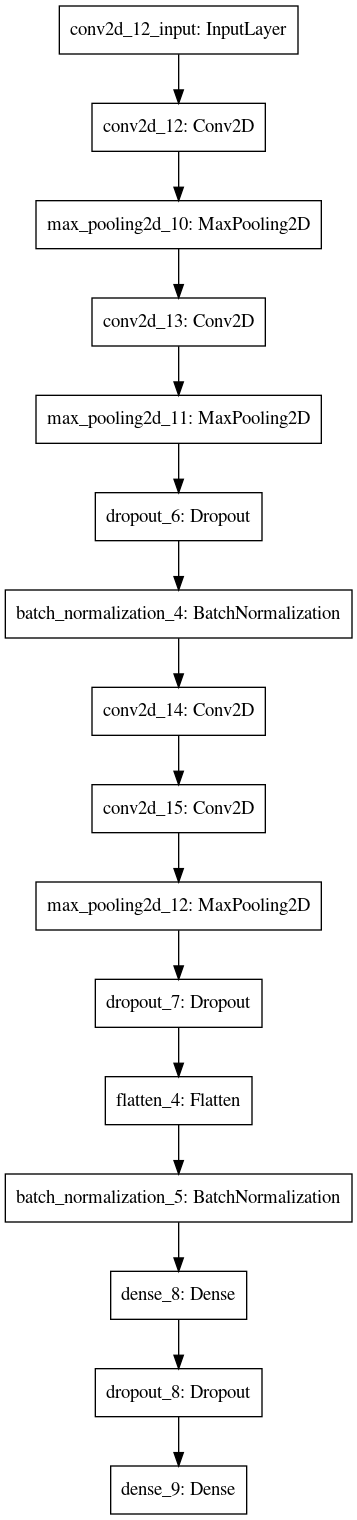

In [ ]:
plot_model(model, to_file='model.png')

*Tweaking the learning rate in adam optimizer for better accuracy*

In [ ]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/100
352/352 [==============================] - 3s 8ms/step - loss: 0.5952 - accuracy: 0.7844 - val_loss: 0.4067 - val_accuracy: 0.8524
Epoch 2/100
352/352 [==============================] - 2s 7ms/step - loss: 0.3983 - accuracy: 0.8540 - val_loss: 0.3315 - val_accuracy: 0.8719
Epoch 3/100
352/352 [==============================] - 3s 7ms/step - loss: 0.3474 - accuracy: 0.8713 - val_loss: 0.3050 - val_accuracy: 0.8846
Epoch 4/100
352/352 [==============================] - 2s 7ms/step - loss: 0.3146 - accuracy: 0.8826 - val_loss: 0.2688 - val_accuracy: 0.8974
Epoch 5/100
352/352 [==============================] - 2s 7ms/step - loss: 0.2948 - accuracy: 0.8919 - val_loss: 0.2678 - val_accuracy: 0.9003
Epoch 6/100
352/352 [==============================] - 2s 7ms/step - loss: 0.2836 - accuracy: 0.8944 - val_loss: 0.2541 - val_accuracy: 0.9044
Epoch 7/100
352/352 [==============================] - 2s 7ms/step - loss: 0.2616 - accuracy: 0.9017 - val_loss: 0.2376 - val_accuracy: 0.9137

Epoch 58/100
352/352 [==============================] - 2s 7ms/step - loss: 0.1067 - accuracy: 0.9600 - val_loss: 0.2076 - val_accuracy: 0.9329
Epoch 59/100
352/352 [==============================] - 2s 7ms/step - loss: 0.1048 - accuracy: 0.9607 - val_loss: 0.2155 - val_accuracy: 0.9327
Epoch 60/100
352/352 [==============================] - 2s 6ms/step - loss: 0.1043 - accuracy: 0.9608 - val_loss: 0.2225 - val_accuracy: 0.9310
Epoch 61/100
352/352 [==============================] - 2s 6ms/step - loss: 0.1030 - accuracy: 0.9613 - val_loss: 0.2156 - val_accuracy: 0.9331
Epoch 62/100
352/352 [==============================] - 2s 6ms/step - loss: 0.1103 - accuracy: 0.9588 - val_loss: 0.2165 - val_accuracy: 0.9335
Epoch 63/100
352/352 [==============================] - 2s 7ms/step - loss: 0.1025 - accuracy: 0.9619 - val_loss: 0.2319 - val_accuracy: 0.9303
Epoch 64/100
352/352 [==============================] - 3s 7ms/step - loss: 0.1055 - accuracy: 0.9600 - val_loss: 0.2333 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.9811
Test loss: 0.07374601066112518
Test accuracy: 0.9811499714851379


Great ! we got an accuracy of *98.11 %* which is better than that of our earlier model. 

### 7. Visualizing the results

*Plotting 16 random images with predicted and real class of clothing*

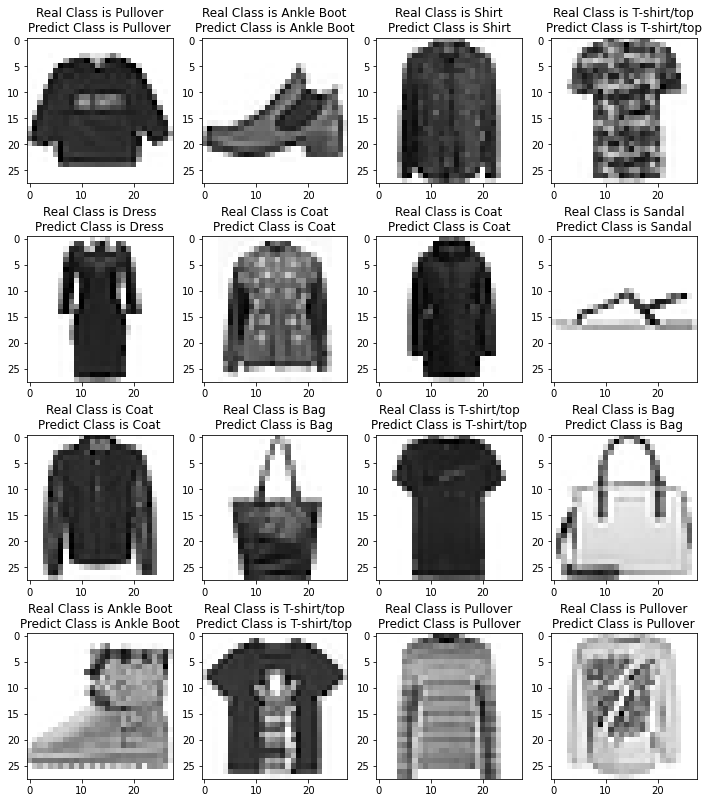

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");

*Plotting the confusion matrix*

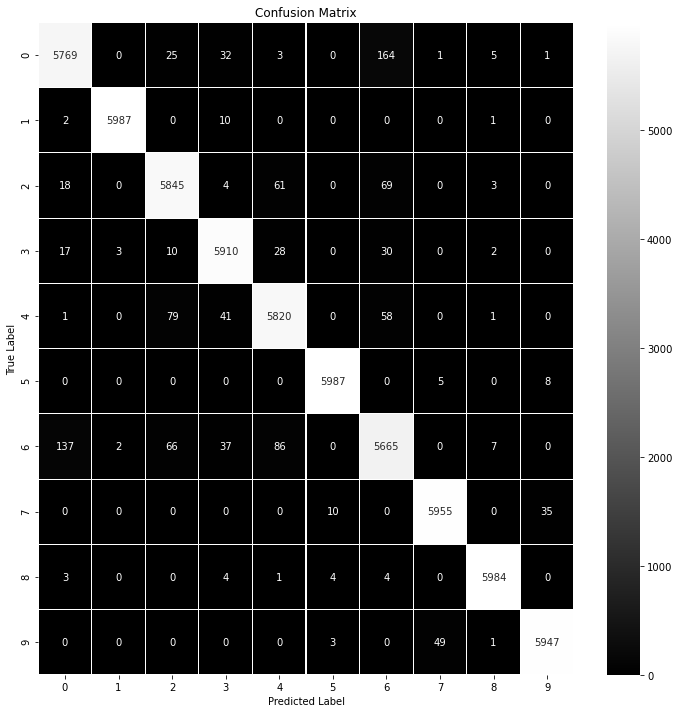

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()